In [1]:
# Essential libraries
import numpy as np 
import pandas as pd
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import optimizers,utils,regularizers
from keras.models import Sequential, Model, load_model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D, Input
from keras.layers import Conv2D, Activation,MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SoP/train2.csv')

In [4]:
df

,Age,Sex,Group,Duration_(sec),MLU_Utts,MLU_Morphemes,FREQ_TTR,Words_Min,Verbs_Utt,%_Word_Errors,Utt_Errors,density,%_Nouns,%_Plurals,%_Verbs,%_Aux,%_Mod,%_3S,%_13S,%_PAST,%_PASTP,%_PRESP,%_prep,%_adj,%_adv,%_conj,%_det,%_pro,noun_verb,retracing,repetition,mor_Utts,mor_syllables,syllables_min,%_Prolongation,Mean_RU,%_Phonological_fragment,%_Phrase_repetitions,%_Word_revisions,%_Phrase_revisions,%_Pauses,%_Filled_pauses,%_TD,SLD_Ratio,Content_words_ratio,Function_words_ratio,N,V,Q,S
0,58.0,0,Control,56,16,9.250,0.523,141.429,1.563,0.000,1,0.371,25.000,21.212,18.939,5.303,0.758,52.000,0.000,0.000,8.000,24.000,9.848,6.061,6.061,0.000,15.909,5.303,1.320,1,2,18.0,176.0,178.983,0.000,1.0,0.0,0.568,0.000,0.568,0.000,0.0,1.136,0.333000,0.00,0.014,19.000000,19.000000,8.000000,15.000000
1,59.0,0,Control,65,14,7.714,0.490,94.154,1.067,0.000,2,0.353,29.412,20.000,15.686,7.843,0.000,68.750,0.000,0.000,0.000,50.000,3.922,6.863,3.922,0.000,14.706,6.863,1.875,1,0,15.0,131.0,120.923,0.000,0.0,0.0,0.000,0.000,0.763,0.000,0.0,0.763,0.000000,0.00,0.000,17.000000,16.000000,8.000000,16.000000
2,60.0,0,Control,62,14,12.071,0.469,140.323,1.571,0.000,1,0.400,21.379,29.032,15.862,6.207,0.690,60.870,0.000,0.000,4.348,30.435,9.655,6.207,8.276,2.759,14.483,6.897,1.348,0,1,16.0,195.0,172.059,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,1.000000,0.00,0.012,16.815287,17.732484,9.866242,14.993631
3,61.0,0,Control,89,11,17.091,0.503,111.236,2.818,0.000,0,0.491,19.394,12.500,21.818,3.636,1.212,16.667,19.444,47.222,13.889,25.000,4.242,4.242,7.273,1.818,12.727,9.697,0.889,2,1,12.0,217.0,143.077,0.000,0.0,0.0,0.461,0.922,0.000,0.000,0.0,1.382,0.000000,0.00,0.000,18.000000,28.000000,14.000000,22.000000
4,72.0,1,Control,34,13,7.846,0.568,155.294,1.000,1.136,1,0.386,26.136,17.391,15.909,10.227,0.000,100.000,0.000,0.000,7.143,57.143,7.955,3.409,4.545,1.136,15.909,6.818,1.643,1,0,14.0,113.0,183.243,0.885,0.0,0.0,0.000,0.885,0.000,0.000,0.0,0.885,0.500000,0.00,0.000,18.000000,18.000000,8.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,65.0,0,ProbableAD,22,6,6.833,0.811,100.909,0.667,0.000,0,0.351,32.432,25.000,10.811,5.405,0.000,25.000,50.000,50.000,25.000,0.000,18.919,8.108,0.000,0.000,16.216,8.108,3.000,0,0,9.0,68.0,120.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.223544,0.00,0.000,15.000000,16.000000,9.000000,10.000000
1263,73.0,0,ProbableAD,21,7,6.714,0.744,122.857,1.000,0.000,0,0.349,18.605,12.500,18.605,2.326,4.651,12.500,0.000,0.000,0.000,25.000,9.302,4.651,2.326,2.326,18.605,6.977,1.000,0,0,24.0,179.0,108.485,0.000,0.0,0.0,0.000,0.559,0.559,0.559,0.0,1.676,0.000000,0.00,0.000,17.000000,26.000000,9.000000,15.000000
1264,71.0,0,ProbableAD,48,6,6.000,0.694,45.000,1.500,0.000,0,0.333,27.778,0.000,25.000,0.000,0.000,44.444,0.000,11.111,0.000,0.000,2.778,2.778,2.778,0.000,16.667,8.333,1.111,0,1,16.0,86.0,55.484,0.000,1.0,0.0,0.000,0.000,0.000,2.326,0.0,2.326,0.500000,0.04,0.000,14.000000,13.000000,13.000000,15.000000
1265,74.0,0,PossibleAD,26,6,8.667,0.717,106.154,1.167,0.000,0,0.391,28.261,23.077,15.217,2.174,0.000,28.571,0.000,28.571,0.000,14.286,13.043,4.348,4.348,0.000,19.565,6.522,1.857,1,0,7.0,60.0,124.138,1.667,0.0,0.0,0.000,0.000,1.667,1.667,0.0,3.333,0.333000,0.00,0.000,17.000000,14.000000,4.000000,13.000000


In [5]:
print(df['Group'].value_counts())

ProbableAD    762
Control       243
MCI           162
PossibleAD     68
Vascular       20
Memory         12
Name: Group, dtype: int64


In [6]:
df = df[df["Group"] != "MCI"]
df = df[df["Group"] != "Vascular"]
df = df[df["Group"] != "Memory"]
df = df[df["Group"] != "PossibleAD"]

In [7]:
df['Group'] = df['Group'].replace('Control',0)
df['Group'] = df['Group'].replace('ProbableAD',1)


In [8]:
df

,Age,Sex,Group,Duration_(sec),MLU_Utts,MLU_Morphemes,FREQ_TTR,Words_Min,Verbs_Utt,%_Word_Errors,Utt_Errors,density,%_Nouns,%_Plurals,%_Verbs,%_Aux,%_Mod,%_3S,%_13S,%_PAST,%_PASTP,%_PRESP,%_prep,%_adj,%_adv,%_conj,%_det,%_pro,noun_verb,retracing,repetition,mor_Utts,mor_syllables,syllables_min,%_Prolongation,Mean_RU,%_Phonological_fragment,%_Phrase_repetitions,%_Word_revisions,%_Phrase_revisions,%_Pauses,%_Filled_pauses,%_TD,SLD_Ratio,Content_words_ratio,Function_words_ratio,N,V,Q,S
0,58.0,0,0,56,16,9.250,0.523,141.429,1.563,0.000,1,0.371,25.000,21.212,18.939,5.303,0.758,52.000,0.000,0.000,8.000,24.000,9.848,6.061,6.061,0.000,15.909,5.303,1.320,1,2,18.0,176.0,178.983,0.000,1.0,0.0,0.568,0.000,0.568,0.000,0.0,1.136,0.333000,0.00,0.014,19.000000,19.000000,8.000000,15.000000
1,59.0,0,0,65,14,7.714,0.490,94.154,1.067,0.000,2,0.353,29.412,20.000,15.686,7.843,0.000,68.750,0.000,0.000,0.000,50.000,3.922,6.863,3.922,0.000,14.706,6.863,1.875,1,0,15.0,131.0,120.923,0.000,0.0,0.0,0.000,0.000,0.763,0.000,0.0,0.763,0.000000,0.00,0.000,17.000000,16.000000,8.000000,16.000000
2,60.0,0,0,62,14,12.071,0.469,140.323,1.571,0.000,1,0.400,21.379,29.032,15.862,6.207,0.690,60.870,0.000,0.000,4.348,30.435,9.655,6.207,8.276,2.759,14.483,6.897,1.348,0,1,16.0,195.0,172.059,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,1.000000,0.00,0.012,16.815287,17.732484,9.866242,14.993631
3,61.0,0,0,89,11,17.091,0.503,111.236,2.818,0.000,0,0.491,19.394,12.500,21.818,3.636,1.212,16.667,19.444,47.222,13.889,25.000,4.242,4.242,7.273,1.818,12.727,9.697,0.889,2,1,12.0,217.0,143.077,0.000,0.0,0.0,0.461,0.922,0.000,0.000,0.0,1.382,0.000000,0.00,0.000,18.000000,28.000000,14.000000,22.000000
4,72.0,1,0,34,13,7.846,0.568,155.294,1.000,1.136,1,0.386,26.136,17.391,15.909,10.227,0.000,100.000,0.000,0.000,7.143,57.143,7.955,3.409,4.545,1.136,15.909,6.818,1.643,1,0,14.0,113.0,183.243,0.885,0.0,0.0,0.000,0.885,0.000,0.000,0.0,0.885,0.500000,0.00,0.000,18.000000,18.000000,8.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,79.0,0,1,31,7,4.571,0.774,60.000,0.857,0.000,0,0.323,29.032,0.000,19.355,0.000,0.000,50.000,0.000,16.667,0.000,0.000,6.452,6.452,0.000,0.000,16.129,12.903,1.500,0,0,17.0,80.0,87.273,0.000,0.0,0.0,0.000,0.000,0.000,3.750,0.0,3.750,0.000000,0.00,0.000,15.000000,14.000000,13.000000,6.000000
1261,78.0,0,1,24,5,5.200,0.923,65.000,1.000,0.000,0,0.346,23.077,0.000,19.231,0.000,3.846,40.000,0.000,0.000,0.000,0.000,3.846,0.000,11.538,0.000,11.538,23.077,1.200,0,0,13.0,49.0,58.800,0.000,0.0,0.0,0.000,0.000,0.000,4.082,0.0,4.082,0.000000,0.00,0.000,13.000000,10.000000,15.000000,8.000000
1262,65.0,0,1,22,6,6.833,0.811,100.909,0.667,0.000,0,0.351,32.432,25.000,10.811,5.405,0.000,25.000,50.000,50.000,25.000,0.000,18.919,8.108,0.000,0.000,16.216,8.108,3.000,0,0,9.0,68.0,120.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.223544,0.00,0.000,15.000000,16.000000,9.000000,10.000000
1263,73.0,0,1,21,7,6.714,0.744,122.857,1.000,0.000,0,0.349,18.605,12.500,18.605,2.326,4.651,12.500,0.000,0.000,0.000,25.000,9.302,4.651,2.326,2.326,18.605,6.977,1.000,0,0,24.0,179.0,108.485,0.000,0.0,0.0,0.000,0.559,0.559,0.559,0.0,1.676,0.000000,0.00,0.000,17.000000,26.000000,9.000000,15.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1264
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1005 non-null   float64
 1   Sex                      1005 non-null   int64  
 2   Group                    1005 non-null   int64  
 3   Duration_(sec)           1005 non-null   int64  
 4   MLU_Utts                 1005 non-null   int64  
 5   MLU_Morphemes            1005 non-null   float64
 6   FREQ_TTR                 1005 non-null   float64
 7   Words_Min                1005 non-null   float64
 8   Verbs_Utt                1005 non-null   float64
 9   %_Word_Errors            1005 non-null   float64
 10  Utt_Errors               1005 non-null   int64  
 11  density                  1005 non-null   float64
 12  %_Nouns                  1005 non-null   float64
 13  %_Plurals                1005 non-null   float64
 14  %_Verbs                 

In [10]:
y = df['Group']
x = df.drop(['Group'],axis = 1) 

In [11]:
print(x.shape)
print(y.shape)

(1005, 49)
(1005,)


In [12]:
from sklearn.model_selection import train_test_split
x_1, x_test, y_1, y_test = train_test_split(x, y, test_size=0.15)
x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, test_size=0.2)

In [ ]:
print(x_train['Age'].size)
print(x_val['Age'].size)
print(x_test['Age'].size)

683
171
151


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(units = 64, activation = 'relu', input_dim = 49))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units = 128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(units = 256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(units = 256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(units = 64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
opt = optimizers.Adam(lr=0.004)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=60, validation_data=(x_val,y_val))

Epoch 1/60
22/22 [==============================] - 1s 25ms/step - loss: 0.7955 - accuracy: 0.6471 - val_loss: 0.4430 - val_accuracy: 0.8070
Epoch 2/60
22/22 [==============================] - 0s 6ms/step - loss: 0.5090 - accuracy: 0.7980 - val_loss: 0.3610 - val_accuracy: 0.8480
Epoch 3/60
22/22 [==============================] - 0s 6ms/step - loss: 0.3996 - accuracy: 0.8521 - val_loss: 0.3973 - val_accuracy: 0.8480
Epoch 4/60
22/22 [==============================] - 0s 7ms/step - loss: 0.3590 - accuracy: 0.8536 - val_loss: 0.3874 - val_accuracy: 0.8538
Epoch 5/60
22/22 [==============================] - 0s 7ms/step - loss: 0.3255 - accuracy: 0.8741 - val_loss: 0.4992 - val_accuracy: 0.8304
Epoch 6/60
22/22 [==============================] - 0s 7ms/step - loss: 0.2723 - accuracy: 0.8843 - val_loss: 0.5453 - val_accuracy: 0.8480
Epoch 7/60
22/22 [==============================] - 0s 6ms/step - loss: 0.2594 - accuracy: 0.9019 - val_loss: 0.4104 - val_accuracy: 0.8713
Epoch 8/60
22/22 [=

In [ ]:
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

print(model.evaluate(x_train,y_train))
print(model.evaluate(x_val,y_val))
print(model.evaluate(x_test,y_test))

22/22 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9854
[0.04146282747387886, 0.985358715057373]
6/6 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8655
[0.4386129081249237, 0.8654970526695251]
5/5 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.9205
[0.30931103229522705, 0.9205297827720642]


In [ ]:
yhat_classes = model.predict_classes(x_test, verbose=0)

In [ ]:
yhat_classes

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, yhat_classes, normalize='true')
print(matrix)

[[0.91891892 0.08108108]
 [0.07894737 0.92105263]]


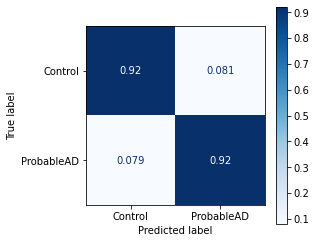

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

display_labels = ['Control','ProbableAD']
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=display_labels)

fig, ax = plt.subplots(figsize=(4, 4))

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True, cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal')
plt.show()

Apart from displaying this confusion matrix, could also display **classification_report**, which basically gives the precision, recall, f1-score
, etc. from the confusion matrix generated above. **classification_report** is present within `sklearn.metrics`.

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/SoP/Saved Models/binary_classfication_m')
model.save('/content/drive/MyDrive/Colab Notebooks/SoP/Saved Models/binary_classication_m.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/SoP/Saved Models/binary_classfication_m/assets
